In [8]:
# BEFORE THE WORKSHOP:

# 1. Activate your conda environment: (source) activate caispp
# 2. Run: conda install nb_conda
# 3. Run: pip install matplotlib, pip install pandas
# 4. Reactivate environment: source deactivate caispp, source activate caispp
# 5. Run: jupyter notebook

In [1]:
import pandas as pd

# Get ready to read in dataset
headers = ['# pregnant', 'Plasma glucose concentration', 'blood pressure', 'skin fold thickness', 'insulin', \
           'bmi', 'Diabetes pedigree', 'age', 'label']

In [2]:
diabetes_df = pd.read_csv('pima-indians-diabetes.data.txt', names=headers)

In [3]:
diabetes_df.head()

,# pregnant,Plasma glucose concentration,blood pressure,skin fold thickness,insulin,bmi,Diabetes pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# for use later
num_features = 8

In [5]:
# "1" = diabetes, "0" = no diabetes
labels = diabetes_df['label'].values
print(labels)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [6]:
import numpy as np

# Convert output from numerical (0 or 1) to categorical (one-hot vector encoding)
def to_categorical(y, nb_classes):
    """ to_categorical.

    Convert class vector (integers from 0 to nb_classes)
    to binary class matrix, for use with categorical_crossentropy.

    Arguments:
        y: `array`. Class vector to convert.
        nb_classes: `int`. Total number of classes.

    """
    y = np.asarray(y, dtype='int32')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    Y[np.arange(len(y)),y] = 1.
    return Y

In [7]:
# Convert diabetes labels to categorical output
# Left column: no diabetes | Right column: has diabetes

labels = to_categorical(labels,2)
labels = labels.astype(np.float32, copy = False)
print(labels)
print(labels.shape)

[[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]
(768, 2)


In [8]:
# Extract feature vectors array from the pandas dataframe
data = diabetes_df.iloc[:,:8].values
data = data.astype(np.float32, copy = False)
print(data.shape)

(768, 8)


In [9]:
# Normalize the input data: mean-centered, bounded by 1
# For each feature: calculate mean and max
    # Subtract mean, divide by maximum

for i in range(num_features):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    data[:, i] = (data[:, i]-feature_avg)/feature_max

print(data)

[[ 0.12676165  0.13620839  0.02372567 ...,  0.02395559  0.06410069
   0.20690264]
 [-0.167356   -0.18037453 -0.02545466 ..., -0.08036629 -0.04994887
  -0.02766527]
 [ 0.24440873  0.31208777 -0.0418481  ..., -0.12954664  0.08269574
  -0.01531959]
 ..., 
 [ 0.06793812  0.00052999  0.02372567 ..., -0.08632754 -0.09375053
  -0.04001095]
 [-0.167356    0.02565562 -0.07463499 ..., -0.02820534 -0.05077532
   0.16986559]
 [-0.167356   -0.14017352  0.00733222 ..., -0.02373441 -0.06482492
  -0.12643071]]


In [10]:
# Train-test split
train_x = data[:700]
train_y = labels[:700]
test_x = data[700:]
test_y = labels[700:]
print(test_y.shape)

(68, 2)


In [11]:
import tensorflow as tf

In [12]:
# Batch gradient descent: randomly sample from the training set, use gradient descent on that sample
# Then: repeat sampling/training ___ times

def generate_batch(batch_size):
    indexes = np.random.randint(699, size = (batch_size,))
    return train_x[indexes], train_y[indexes]

In [23]:
# --- Set up the TensorFlow variables ---
# (Add variables to TensorFlow's computational graph)

# Reset the graph
tf.reset_default_graph()

# Input placeholder (8 features)
    # TODO: fill in this line
x=tf.placeholder(tf.float32,[None,8])
# Weights variable (8 features x 2 output categories)
    # Use xavier_initializer (a commonly used type of weight initialization)
        # random values centered around 0
    # TODO: fill in this line
W=tf.get_variable('W',shape=[8,2],initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.zeros([2]))
# Biases variable: initialized to zero
    # TODO: fill in this line

# Define prediction (y) operation
# Uses the softmax activation function: 
    # Similar to sigmoid (outputs between 0-1), but also makes sure both outputted probabilities add up to 1
    # TODO: fill this line in
y=tf.nn.softmax(tf.matmul(x,W)+b)
# y_: actual labels
y_ = tf.placeholder(tf.float32, [None, 2])

# Define loss function: cross-entropy loss
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

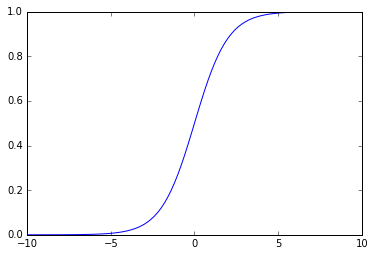

In [24]:
# As a refresher, here's what the sigmoid function looks like; squashes input between 0 and 1 
# which makes it great for classification
import math
import matplotlib.pyplot as plt
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x_vals = np.arange(-10., 10., 0.2)
sig = sigmoid(x_vals)
plt.plot(x_vals,sig)
plt.show()

In [25]:
# Training operation: gradient descent step
# TensorFlow automatically takes care of the gradient calculations
train_step = tf.train.GradientDescentOptimizer(.01).minimize(loss)

# Get ready to run TensorFlow - set up the session
sess = tf.InteractiveSession() # create the sesion object
tf.global_variables_initializer().run() # initialize variables

In [26]:
# Run gradient descent
for i in range(10000):
    batch_xs, batch_ys = generate_batch(100) # get the x training batch and y training batch
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys}) # this evaluates the computational graph
        # passes batch_xs in for the x placeholder, batch_ys in for the y_ placeholder

In [27]:
# Define accuracy-evaluation operations

# list of booleans: whether each each example's highest predicted value matches actual value
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

# take the average over that list to calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 

In [28]:
# Evaluate accuracy on test set
print(sess.run(accuracy, feed_dict={x: test_x, y_: test_y}))

0.764706
